### Oversmapling & Undersampling using sklearn package

In [4]:
import pandas as pd
import numpy as np
# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv(r"C:\Users\Nikita\Downloads\HR_comma_sep.csv")

In [6]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# from sklearn.utils import resample

In [8]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [9]:
11428/ ( 3571+11428)

0.7619174611640777

## Running Model on Imbalance class data

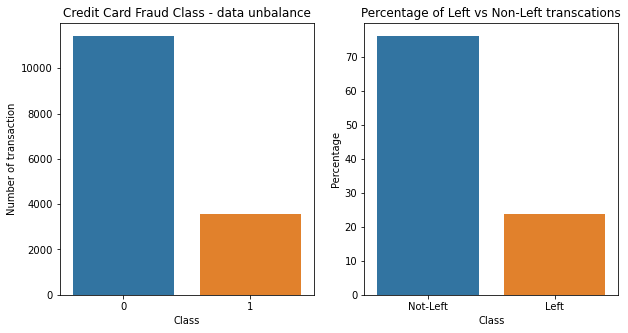

In [10]:

classes=data['left'].value_counts()
normal_share=round(classes[0]/data['left'].count()*100,2)
fraud_share=round(classes[1]/data['left'].count()*100, 2)
normal_share, fraud_share

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data["left"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Not-Left', 'Left'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Left vs Non-Left transcations')

plt.show()

In [11]:
data=pd.get_dummies(data)

In [12]:

X=data.drop(columns=["left"])
y=data.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:
scaler = StandardScaler()

# Scaling the train data
X_train1 = scaler.fit_transform(X_train)

X_trains=pd.DataFrame(X_train1, columns=X_train.columns)

# Transforming the test data
X_test1 = scaler.transform(X_test)
X_tests=pd.DataFrame(X_test1, columns=X_test.columns)

In [14]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
def new_ratio(y):
    zero=len(y)-y.sum()
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%")

In [15]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_trains,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [16]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020233,2.282336e-03,0.008060,0.001165,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.975382,0.982897,0.976648,0.978309,0.003285,3
1,0.022688,5.947763e-04,0.008252,0.000448,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.975382,0.982897,0.976648,0.978309,0.003285,3
2,0.018928,3.586417e-03,0.005332,0.003771,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.970170,0.980265,0.976087,0.975507,0.004142,7
3,0.023841,2.244460e-04,0.005129,0.003630,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.970170,0.980265,0.976087,0.975507,0.004142,7
4,0.026385,3.888423e-03,0.005334,0.003771,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.978378,0.985273,0.980776,0.981476,0.002858,1
5,0.029256,3.803344e-03,0.002666,0.003771,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.978378,0.985273,0.980675,0.981442,0.002867,2
6,0.024001,3.893359e-07,0.000000,0.000000,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.972045,0.983133,0.977267,0.977482,0.004529,5
7,0.021334,3.772255e-03,0.002668,0.003773,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.972045,0.983114,0.977252,0.977470,0.004521,6


In [17]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.981475670767142
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [18]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_imb_model.fit(X_trains, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [19]:
y_train_pred = dt_imb_model.predict(X_trains)
display_scores(y_train, y_train_pred)

F1 Score: 93.52%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9134
           1       0.96      0.91      0.94      2865

    accuracy                           0.97     11999
   macro avg       0.97      0.95      0.96     11999
weighted avg       0.97      0.97      0.97     11999



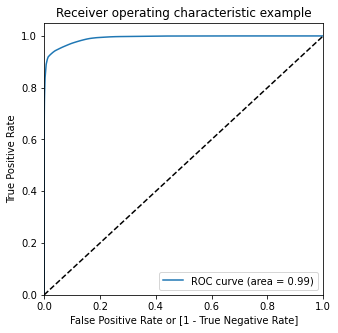

In [20]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_trains)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [21]:
y_test_pred = dt_imb_model.predict(X_tests)
display_scores(y_test, y_test_pred)

F1 Score: 91.87%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2294
           1       0.95      0.89      0.92       706

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



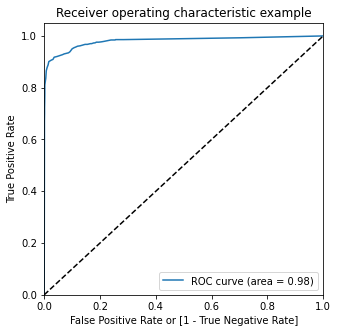

In [22]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_tests)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [23]:
# help(RandomOverSampler)

In [24]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=.8)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_trains, y_train)

In [25]:
new_ratio(y_over)

Class ratio 1 (7307) :0 (9134) is 44.44% : 55.56%


In [26]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 9134, 1: 2865})
New class distribution:- Counter({0: 9134, 1: 7307})


In [27]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [28]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9883754272867122
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [29]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [30]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 95.36%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9134
           1       0.99      0.92      0.95      7307

    accuracy                           0.96     16441
   macro avg       0.96      0.96      0.96     16441
weighted avg       0.96      0.96      0.96     16441



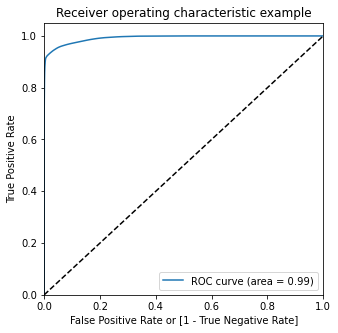

In [31]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [32]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_tests)
display_scores(y_test, y_test_pred)

F1 Score: 92.96%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2294
           1       0.95      0.91      0.93       706

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



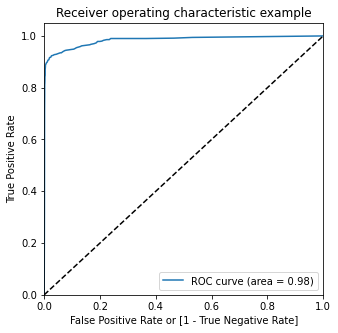

In [33]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

# define oversampling strategy
# undersample = RandomUnderSampler( replacement=False, sampling_strategy={0: 5000, 1: 2800})
undersample = RandomUnderSampler( replacement=False, sampling_strategy=.6)
# fit and apply the transform
X_under, y_under= undersample .fit_resample(X_trains, y_train)

In [35]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_under))

Before sampling class distribution:- Counter({0: 9134, 1: 2865})
New class distribution:- Counter({0: 4775, 1: 2865})


In [36]:
new_ratio(y_under)

Class ratio 1 (2865) :0 (4775) is 37.5% : 62.5%


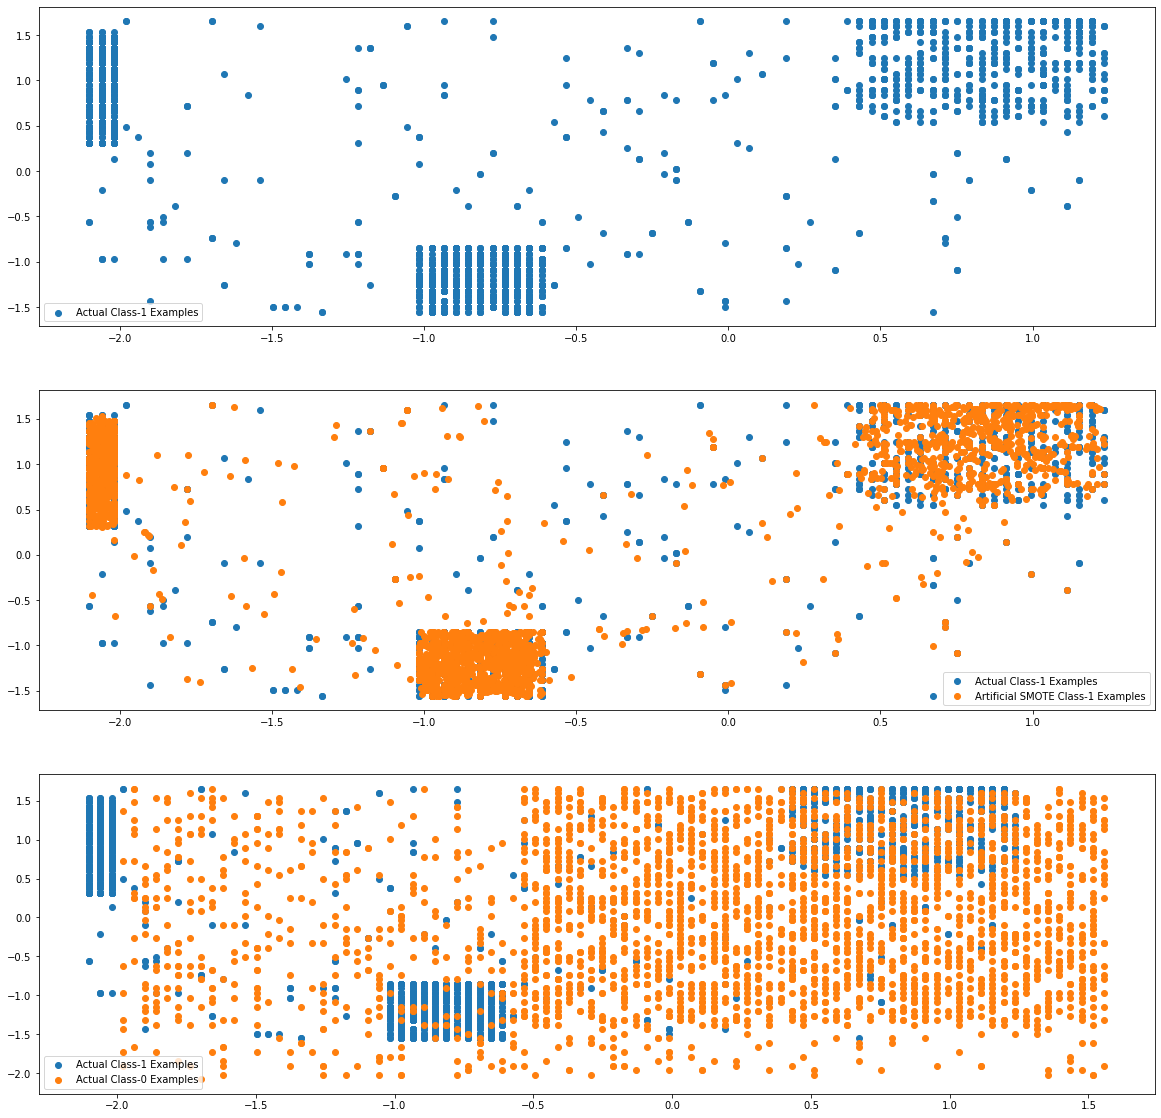

In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_trains, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_trains.shape[0]:]

X_train_1 = X_trains.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_trains.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [38]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [39]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9885206738498541
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [40]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [41]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 95.89%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9134
           1       0.99      0.93      0.96      9134

    accuracy                           0.96     18268
   macro avg       0.96      0.96      0.96     18268
weighted avg       0.96      0.96      0.96     18268



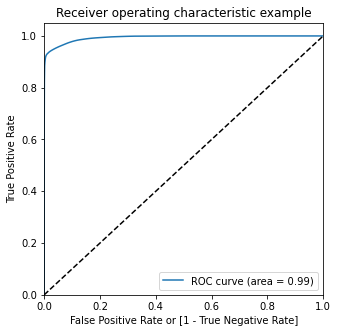

In [42]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [43]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_tests)
display_scores(y_test, y_pred)

F1 Score: 92.13%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2294
           1       0.95      0.90      0.92       706

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



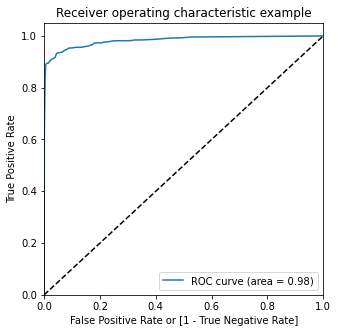

In [44]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

## ADASYN (Adaptive Synthetic Sampling)

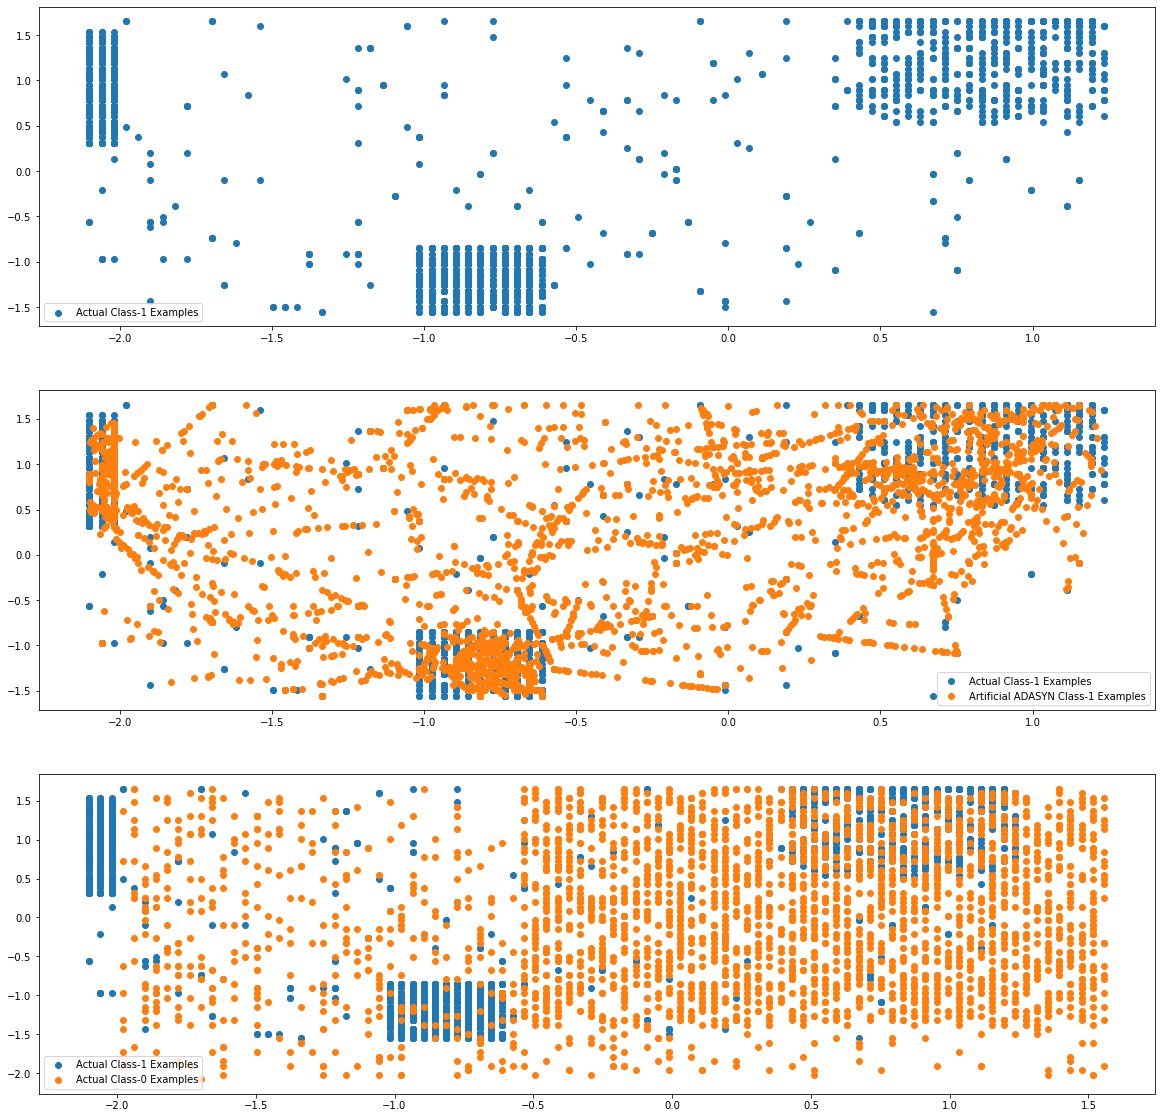

In [45]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_trains, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_trains.shape[0]:]

X_train_1 = X_trains.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_trains.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [46]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [47]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9678986666389356
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [48]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [49]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 93.05%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9134
           1       0.93      0.93      0.93      9127

    accuracy                           0.93     18261
   macro avg       0.93      0.93      0.93     18261
weighted avg       0.93      0.93      0.93     18261



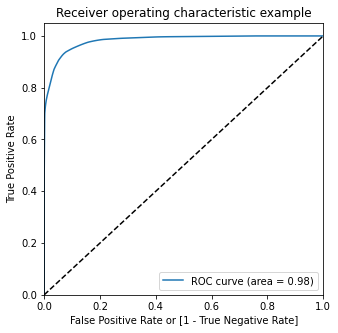

In [50]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [51]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_tests)
display_scores(y_test, y_pred)

F1 Score: 86.97%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2294
           1       0.80      0.95      0.87       706

    accuracy                           0.93      3000
   macro avg       0.89      0.94      0.91      3000
weighted avg       0.94      0.93      0.93      3000



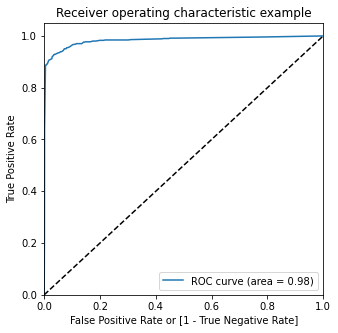

In [52]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_tests)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)